In [1]:
### 週販レポート2025年版
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch


In [4]:
df1 = hs.load_hard_sales()
# 4 weeks before
before_4weeks = hs.current_report_date(df1) - Timedelta(weeks=(4-1))
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=before_4weeks)
display(style1)

In [14]:
hard_sales_df= hs.load_hard_sales()
df = hs.extract_week_reached_units(hard_sales_df, threshold_units=7000000)
df = df[['hw', 'report_date', 'delta_week','sum_units']]
df = df.sort_values(by=['delta_week'])
df.set_index('hw', inplace=True)

df = ch.rename_columns(df)
df = ch.rename_index(df)
df = ch.rename_index_title(df)
# df.columns = ['ハード', '達成年週', '週数', '累計販売数']

display(df)

,集計日,週数,累計台数
ハード,,,
Nintendo DS,2006-04-16,71,7142963
Nintendo 3DS,2012-08-12,76,7022396
GAME BOY ADVANCE,2002-12-15,90,7010702
Nintendo Switch,2019-01-06,96,7115244
PlayStation2,2002-02-03,100,7020883
Wii,2008-11-23,103,7024239
PlayStation Portable,2007-12-09,156,7057453
PlayStation4,2018-09-09,237,7001086
PlayStation5,2025-09-07,251,7009937


In [13]:

def last4weeks_report(df: pd.DataFrame) -> pd.DataFrame:
    last4weeks_df = hs.extract_latest(df, weeks=4)[['report_date', 'hw', 'units', 'sum_units']]
    
    last4weeks_df.set_index(['report_date', 'hw'], inplace=True)
    last4weeks_df.sort_values(by=['report_date', 'units', 'hw'], ascending=[True, False, True], inplace=True)

    return last4weeks_df

hard_sales_df = hs.load_hard_sales()
hard_sales_df = hard_sales_df.loc[hard_sales_df["report_date"] <= datetime(2025,9,7)]

df = last4weeks_report(hard_sales_df)
df = ch.rename_index(df)
df = ch.rename_columns(df)
df = ch.rename_index_title(df)
display(df)

販売台数      累計台数
集計日        ハード                              
2025-08-17 Nintendo Switch2  89821   1856764
           Nintendo Switch   18673  35906964
           PlayStation5       8566   6963510
           Xbox Series X|S     326    682718
           PlayStation4         16   9490739
2025-08-24 Nintendo Switch2  35359   1892123
           Nintendo Switch   17945  35924909
           PlayStation5       6428   6969938
           Xbox Series X|S     287    683005
           PlayStation4         13   9490752
2025-08-31 Nintendo Switch2  41957   1934080
           Nintendo Switch   20589  35945498
           PlayStation5       8304   6978242
           Xbox Series X|S     389    683394
           PlayStation4         16   9490768
2025-09-07 Nintendo Switch2  46403   1980483
           PlayStation5      31695   7009937
           Nintendo Switch   24175  35969673
           Xbox Series X|S     160    683554
           PlayStation4         14   9490782

In [74]:
from typing import Optional


def chart_units_by_date_hw(df: pd.DataFrame, begin:Optional[datetime]=None, end:Optional[datetime]=None) -> tuple[pd.DataFrame, pd.io.formats.style.Styler]:
    if begin is not None:
        df = df[df['report_date'] >= begin]
    if end is not None:
        df = df[df['report_date'] <= end]
        
    df_out = df.set_index(['report_date', 'hw'])
    df_out.sort_values(by=['report_date', 'units', 'hw'], ascending=[True, False, True], inplace=True)
    df_out = df_out[['units', 'sum_units']]
    df_out = ch.rename_index(df_out)
    df_out = ch.rename_columns(df_out)
    df_out = ch.rename_index_title(df_out)

    styled = (df_out.style
        .format({'販売台数': '{:,}', '累計台数': '{:,}'})
        .format_index(lambda t: t.strftime('%Y-%m-%d'),  level=0, axis=0))
    return (df_out, styled)

in1 = hs.load_hard_sales()
(out1, style1) = chart_units_by_date_hw(in1, begin=datetime(2025,8,24))

display(out1)
display(style1)

out1.info()

type(out1.index[0])

販売台数      累計台数
集計日        ハード                              
2025-08-24 Nintendo Switch2  35359   1892123
           Nintendo Switch   17945  35924909
           PlayStation5       6428   6969938
           Xbox Series X|S     287    683005
           PlayStation4         13   9490752
2025-08-31 Nintendo Switch2  41957   1934080
           Nintendo Switch   20589  35945498
           PlayStation5       8304   6978242
           Xbox Series X|S     389    683394
           PlayStation4         16   9490768
2025-09-07 Nintendo Switch2  46403   1980483
           PlayStation5      31695   7009937
           Nintendo Switch   24175  35969673
           Xbox Series X|S     160    683554
           PlayStation4         14   9490782
2025-09-14 Nintendo Switch2  44278   2024761
           PlayStation5      21703   7031640
           Nintendo Switch   19049  35988722
           Xbox Series X|S     125    683679
           PlayStation4         13   9490795

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, (Timestamp('2025-08-24 00:00:00'), 'Nintendo Switch2') to (Timestamp('2025-09-14 00:00:00'), 'PlayStation4')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   販売台数    20 non-null     int64
 1   累計台数    20 non-null     int64
dtypes: int64(2)
memory usage: 1.5+ KB


tuple

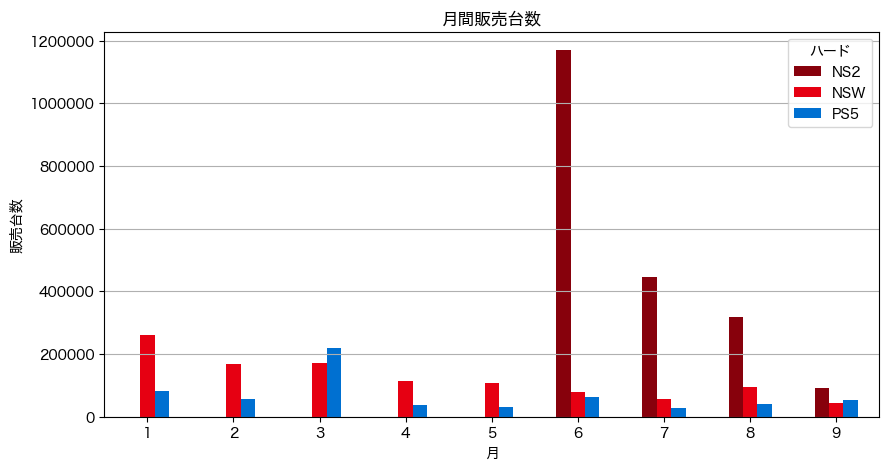

In [5]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW"], year=2025)

In [6]:
df.columns

Index(['NS2', 'NSW', 'PS5'], dtype='object', name='hw')

In [7]:
from typing import List, Optional

def set_comma_format(df: pd.DataFrame, 
                     columns: List[str] = []) -> pd.DataFrame:
    if not columns:
        columns = df.columns
    return df.style.format({col: '{:,.0f}' for col in columns})

df = rename_columns(df)
df = rename_index(df)
df = rename_index_title(df)
df = set_comma_format(df)
display(df)

hw,Nintendo Switch2,Nintendo Switch,PlayStation5
月,,,
1,0,"260,447","81,587"
2,0,"167,188","56,886"
3,0,"171,921","218,300"
4,0,"113,513","38,983"
5,0,"106,506","32,001"
6,"1,169,684","78,097","63,516"
7,"444,706","57,532","28,959"
8,"319,690","94,517","39,004"
9,"90,681","43,224","53,398"


hw,3DS,DS,GBA,NS2,PS2,Wii
delta_week,,,,,,
0,371326.0,441485.0,611504.0,715432.0,630552.0,371936.0
1,577413.0,622716.0,935190.0,868637.0,784797.0,481004.0
2,681825.0,843011.0,1132611.0,1008663.0,856577.0,582960.0
3,746767.0,1056428.0,1272110.0,1169684.0,969197.0,786039.0
4,801423.0,1269845.0,1367434.0,1298327.0,1134882.0,989118.0
5,844601.0,1401962.0,1508524.0,1370212.0,1254312.0,1135671.0
6,877360.0,1460950.0,1649615.0,1522377.0,1330016.0,1232646.0
7,902680.0,1508241.0,1738487.0,1614390.0,1404366.0,1313160.0
8,923955.0,1550496.0,1809362.0,1677123.0,1462517.0,1394541.0


hw,3DS,DS,GBA,NS2,PS2,Wii
delta_week,,,,,,
13,1033333.0,1700752.0,2137065.0,1980483.0,1793715.0,1752238.0


hw   delta_week
3DS  13            1033333.0
DS   13            1700752.0
GBA  13            2137065.0
NS2  13            1980483.0
PS2  13            1793715.0
Wii  13            1752238.0
dtype: float64

,ハード,週数,販売数
2,GBA,13,"2,137,065"
3,NS2,13,"1,980,483"
4,PS2,13,"1,793,715"
5,Wii,13,"1,752,238"
1,DS,13,"1,700,752"
0,3DS,13,"1,033,333"


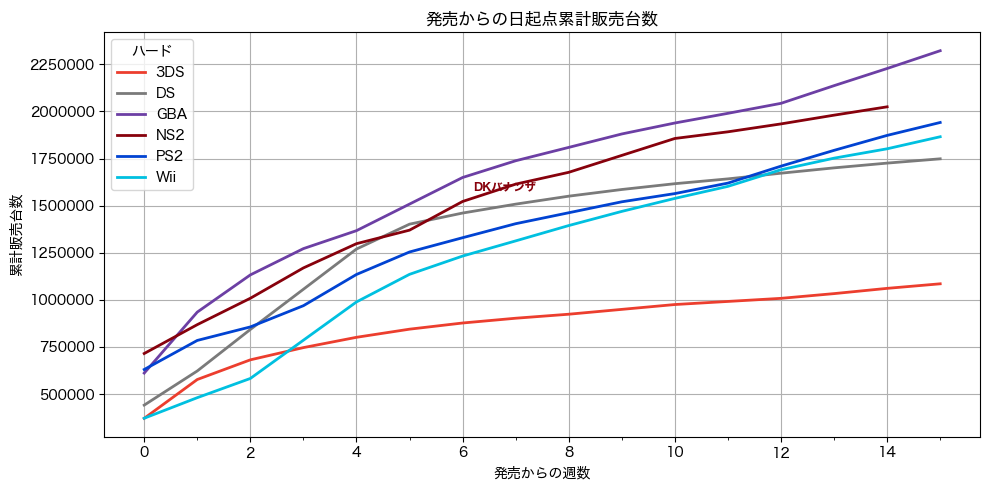

In [8]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS"], 
                                        mode="week", xgrid=2, end=15)

display(df)

df13 = df.iloc[df.index == 13]
display(df13)
display(df13.unstack())
df13up = df13.unstack().reset_index()
df13up = rename_columns(df13up)
clist = df13up.columns.tolist()
clist[2] = '販売数'
df13up.columns = clist
df13up.sort_values(by='販売数', ascending=False, inplace=True)
#df13up = rename_index(df13up)
#df13up = rename_index_title(df13up)
df13up = set_comma_format(df13up, columns=['販売数'])

display(df13up)